**Importing Important Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB

**Reading Csv File**

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\train.csv")

**Basic Checks**

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Insights on Data**

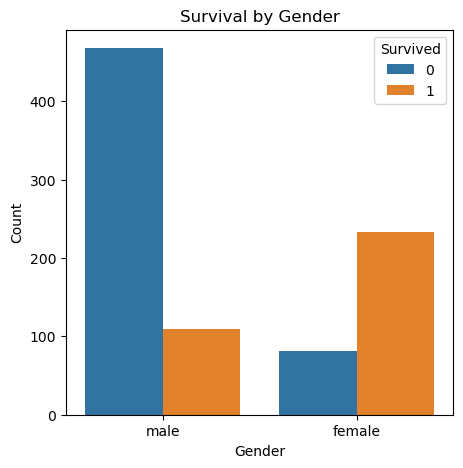

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title("Survival by Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Females are mostly survived than mens**

In [10]:
data['Age_group']=pd.cut(data.Age,bins=[0,20,40,60,80],right=True,labels=['0-20','20-40','40-60','60-80'])

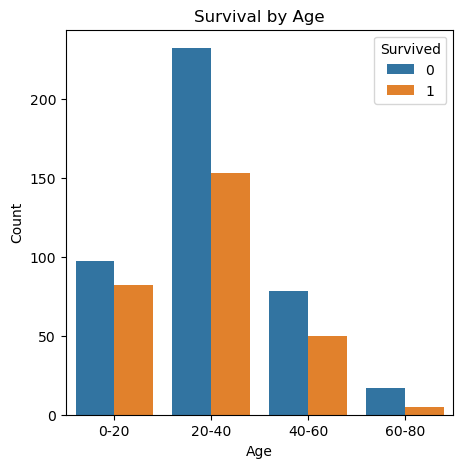

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Age_group',hue='Survived',data=data)
plt.title("Survival by Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Most of the passengers belongs to the 20-40 Age group. Survival rate of 20-40 is high**

In [12]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
data['Fare_group']=pd.cut(data.Fare,bins=[0,10,20,30,513],right=True,labels=['low','mid','mid-high','high'])

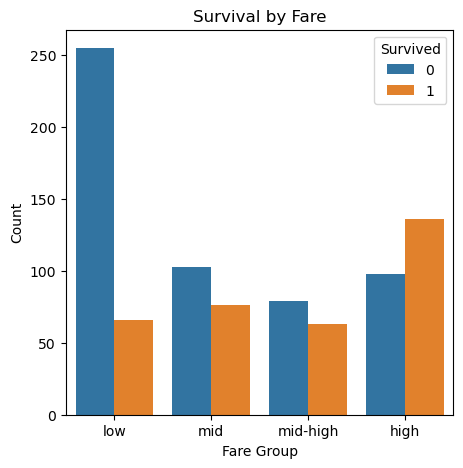

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='Fare_group',hue='Survived',data=data)
plt.title('Survival by Fare')
plt.xlabel('Fare Group')
plt.ylabel('Count')
plt.show()

**Passengers belong to the High_class have the high survival count**

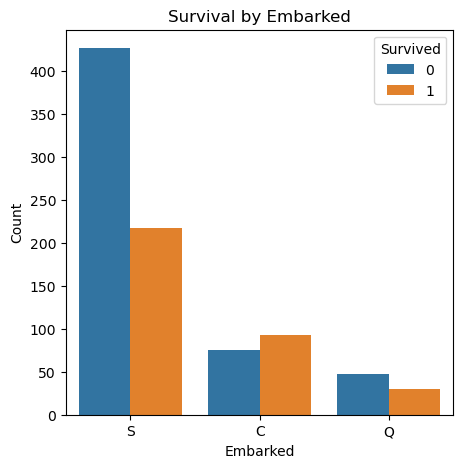

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='Embarked',hue='Survived',data=data)
plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [16]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

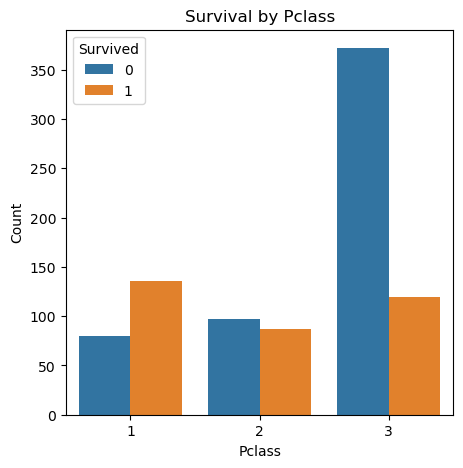

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

**Passengers in 1st class have high survival count than 2nd class and 3rd class**

In [18]:
data['Family']=data['Parch']+data['SibSp']

In [19]:
data['Family']=data['Family'].astype('object')

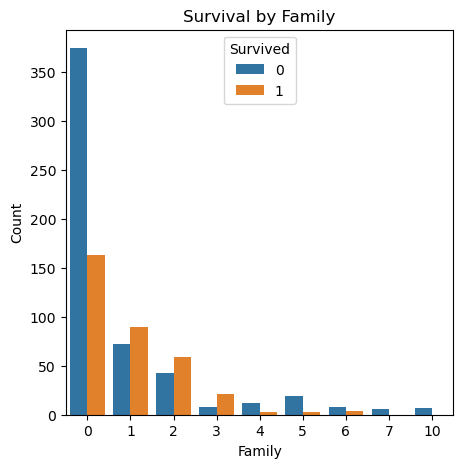

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='Family',hue='Survived',data=data)
plt.title('Survival by Family')
plt.xlabel('Family')
plt.ylabel('Count')
plt.show()

**Passengers who are alone has high survival count**

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-40,low,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,20-40,high,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-40,low,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,20-40,high,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,20-40,low,0


In [22]:
data.drop(['Name','Ticket','Age_group','Fare_group','Family','PassengerId'],axis=1,inplace=True)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


**Data Preprocessing**

In [24]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

**Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=123)

In [26]:
xtrain.shape,xtest.shape

((668, 8), (223, 8))

In [27]:
ytrain.shape,ytest.shape

((668,), (223,))

**Missing values handling**

In [28]:
xtrain.isnull().sum()

Pclass        0
Sex           0
Age         139
SibSp         0
Parch         0
Fare          0
Cabin       522
Embarked      2
dtype: int64

In [29]:
xtrain.drop('Cabin',axis=1,inplace=True)

In [30]:
xtrain['Age'].fillna(xtrain['Age'].median(),inplace=True)

In [31]:
xtrain['Embarked'].value_counts()

S    488
C    118
Q     60
Name: Embarked, dtype: int64

In [32]:
xtrain['Embarked'].fillna('Q',inplace=True)

In [33]:
xtest.isnull().sum()

Pclass        0
Sex           0
Age          38
SibSp         0
Parch         0
Fare          0
Cabin       165
Embarked      0
dtype: int64

In [34]:
xtest.drop('Cabin',axis=1,inplace=True)

In [35]:
xtest['Age'].fillna(xtest['Age'].mean(),inplace=True)

**Label Encoding**

In [36]:
xtrain['Sex']=xtrain['Sex'].replace({'male':1,'female':0})

In [37]:
xtest['Sex']=xtest['Sex'].replace({'male':1,'female':0})

In [38]:
xtrain=xtrain.reset_index(drop=True)
xtest=xtest.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytest=ytest.reset_index(drop=True)

**OneHotEncoding**

In [39]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

In [40]:
ohedata_train = ohe.fit_transform(xtrain[['Embarked']]).toarray()
ohedata_test = ohe.transform(xtest[['Embarked']]).toarray()

In [41]:
ohedata_train = pd.DataFrame(ohedata_train, columns = ohe.get_feature_names_out())
ohedata_test = pd.DataFrame(ohedata_test, columns = ohe.get_feature_names_out())

In [42]:
xtrain=pd.concat([ohedata_train,xtrain],axis=1)
xtest=pd.concat([ohedata_test,xtest],axis=1)

In [43]:
xtrain.drop(['Embarked'],axis=1,inplace=True)
xtest.drop(['Embarked'],axis=1,inplace=True)

In [44]:
xtrain['Age']=xtrain['Age'].astype(int)
xtest['Age']=xtest['Age'].astype(int)

**Scaling**

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
xtrain.iloc[:,[-1]]=sc.fit_transform(xtrain.iloc[:,[-1]])
xtest.iloc[:,[-1]]=sc.transform(xtest.iloc[:,[-1]])

**Model Defining**

nb = GaussianNB()

**Model Fitting**

In [47]:
nb.fit(xtrain, ytrain)

NameError: name 'nb' is not defined

**Predicting Values**

In [ ]:
ypred=nb.predict(xtest)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

**Accuracy Score**

In [ ]:
accuracy=accuracy_score(ytest,ypred)
print(f"accuracy:{accuracy:2f}")

**Confusion Matrix**

In [ ]:
conf_matrix=confusion_matrix(ytest,ypred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

**Roc Curve**

In [ ]:
fpr, tpr, threshold = roc_curve(ytest, ypred)
auc_score = auc(fpr, tpr)
auc_str = "AUC Score: "+ str(auc_score)
plt.plot(fpr,tpr,label=auc_str)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()